In [178]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=300

In [179]:
train = pd.read_csv("2019-1st-ml-month-with-kakr/train.csv")
test = pd.read_csv("2019-1st-ml-month-with-kakr/test.csv")

In [180]:
train = train[['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train= train.dropna()
train['Embarked']=train['Embarked'].apply(lambda x : 0 if x=='S' else (1 if x=='C' else 2))
train['Sex']=train['Sex'].apply(lambda x : 1 if x=='male' else 0)
# train['Age'] = train['Age'].apply(lambda x : 4 if x>60 else(
#                                                 3 if x>40 else(
#                                                   2 if x>20 else(
#                                                     1 if x>10 else 0 ))) )

In [137]:
np.unique(train['Age'])

array([0, 1, 2, 3, 4], dtype=int64)

In [181]:
train['Survived']=train['Survived'].astype('float')
train['Pclass']=train['Pclass'].astype('float') 
train['Sex']=train['Sex'].astype('float')
train['Age']=train['Age'].astype('float')
train['SibSp']=train['SibSp'].astype('float')
train['Parch']=train['Parch'].astype('float')
train['Fare']=train['Fare'].astype('float')
train['Embarked']=train['Embarked'].astype('float')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


In [182]:
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test= test.dropna()
test['Embarked']=test['Embarked'].apply(lambda x : 0 if x=='S' else (1 if x=='C' else 2))
test['Sex']=test['Sex'].apply(lambda x : 1 if x=='male' else 0)
# test['Age'] = test['Age'].apply(lambda x : 4 if x>60 else(
#                                                 3 if x>40 else(
#                                                   2 if x>20 else(
#                                                     1 if x>10 else 0 ))) )

In [183]:
test['Pclass']=test['Pclass'].astype('float') 
test['Sex']=test['Sex'].astype('float')
test['Age']=test['Age'].astype('float')
test['SibSp']=test['SibSp'].astype('float')
test['Parch']=test['Parch'].astype('float')
test['Fare']=test['Fare'].astype('float')
test['Embarked']=test['Embarked'].astype('float')
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.5,0.0,0.0,7.8292,2.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,2.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,0.0


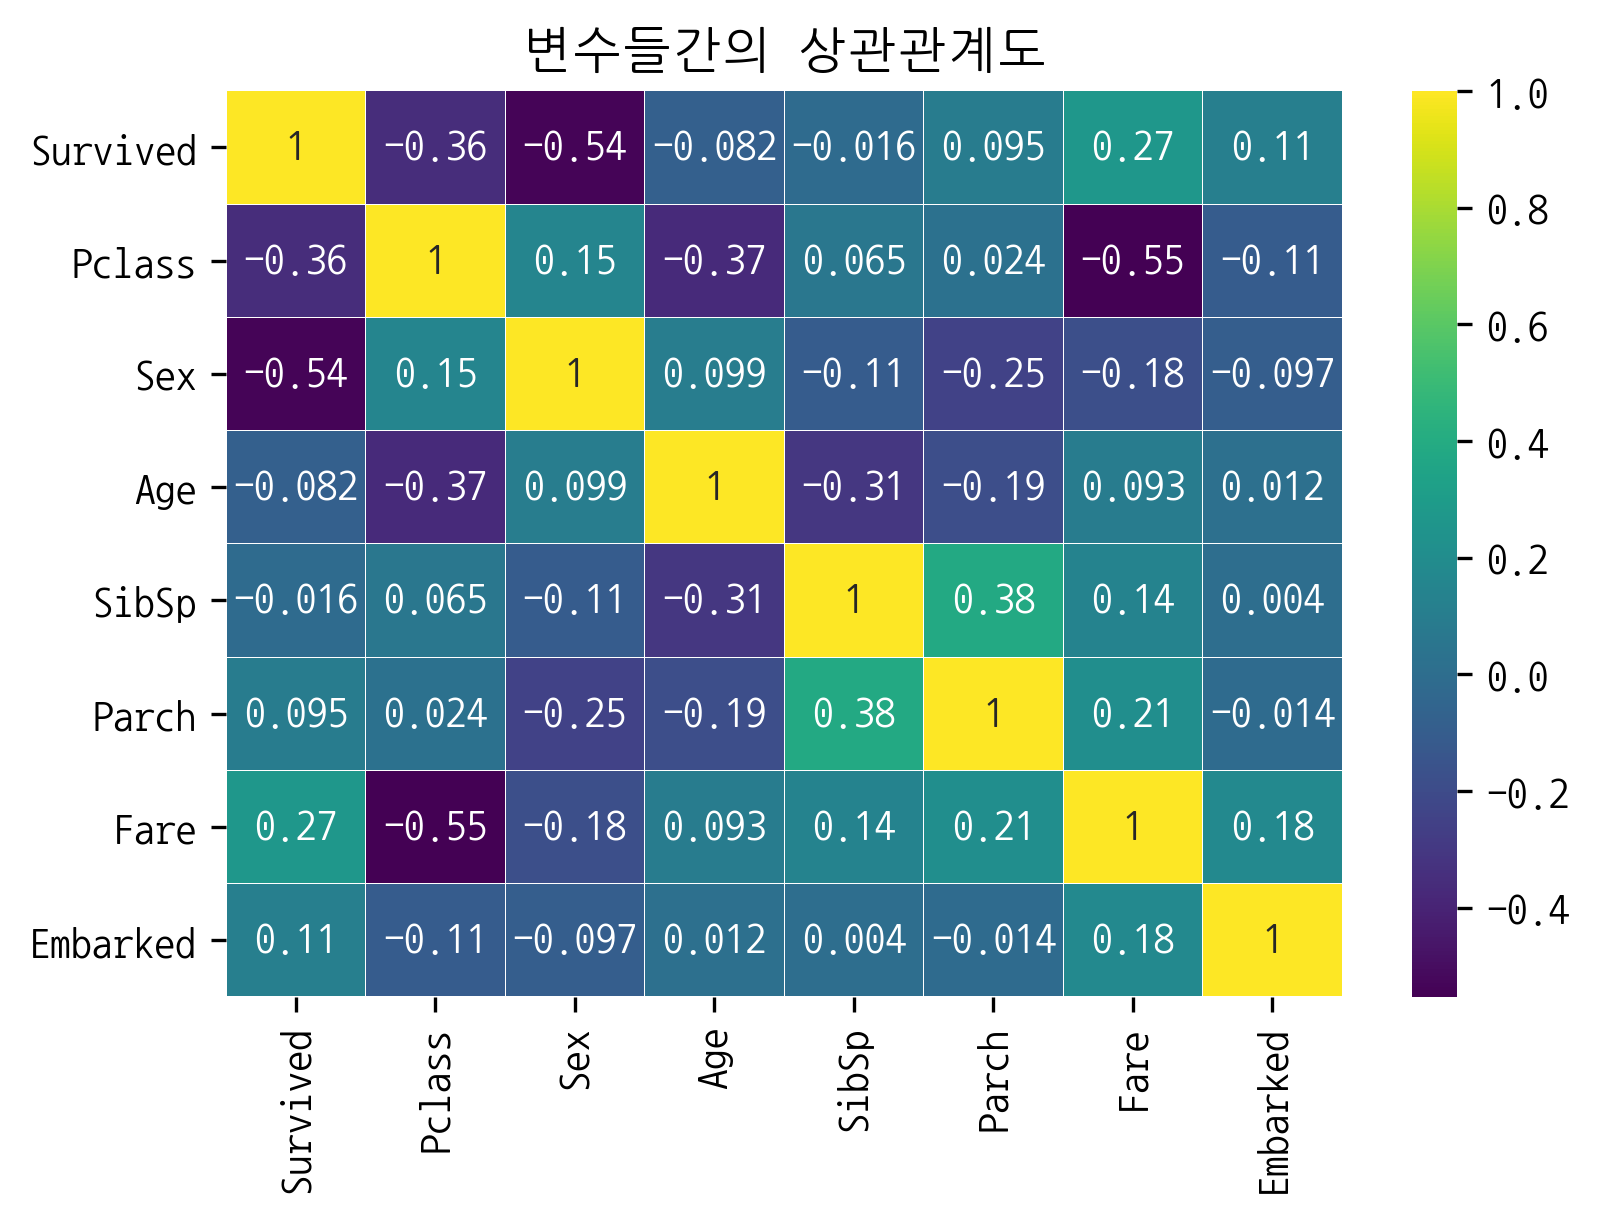

In [184]:
sns.heatmap(train.corr(),linewidths=0.01,square = False,annot=True,cmap=plt.cm.viridis,linecolor='white')
plt.title("변수들간의 상관관계도")
plt.show()

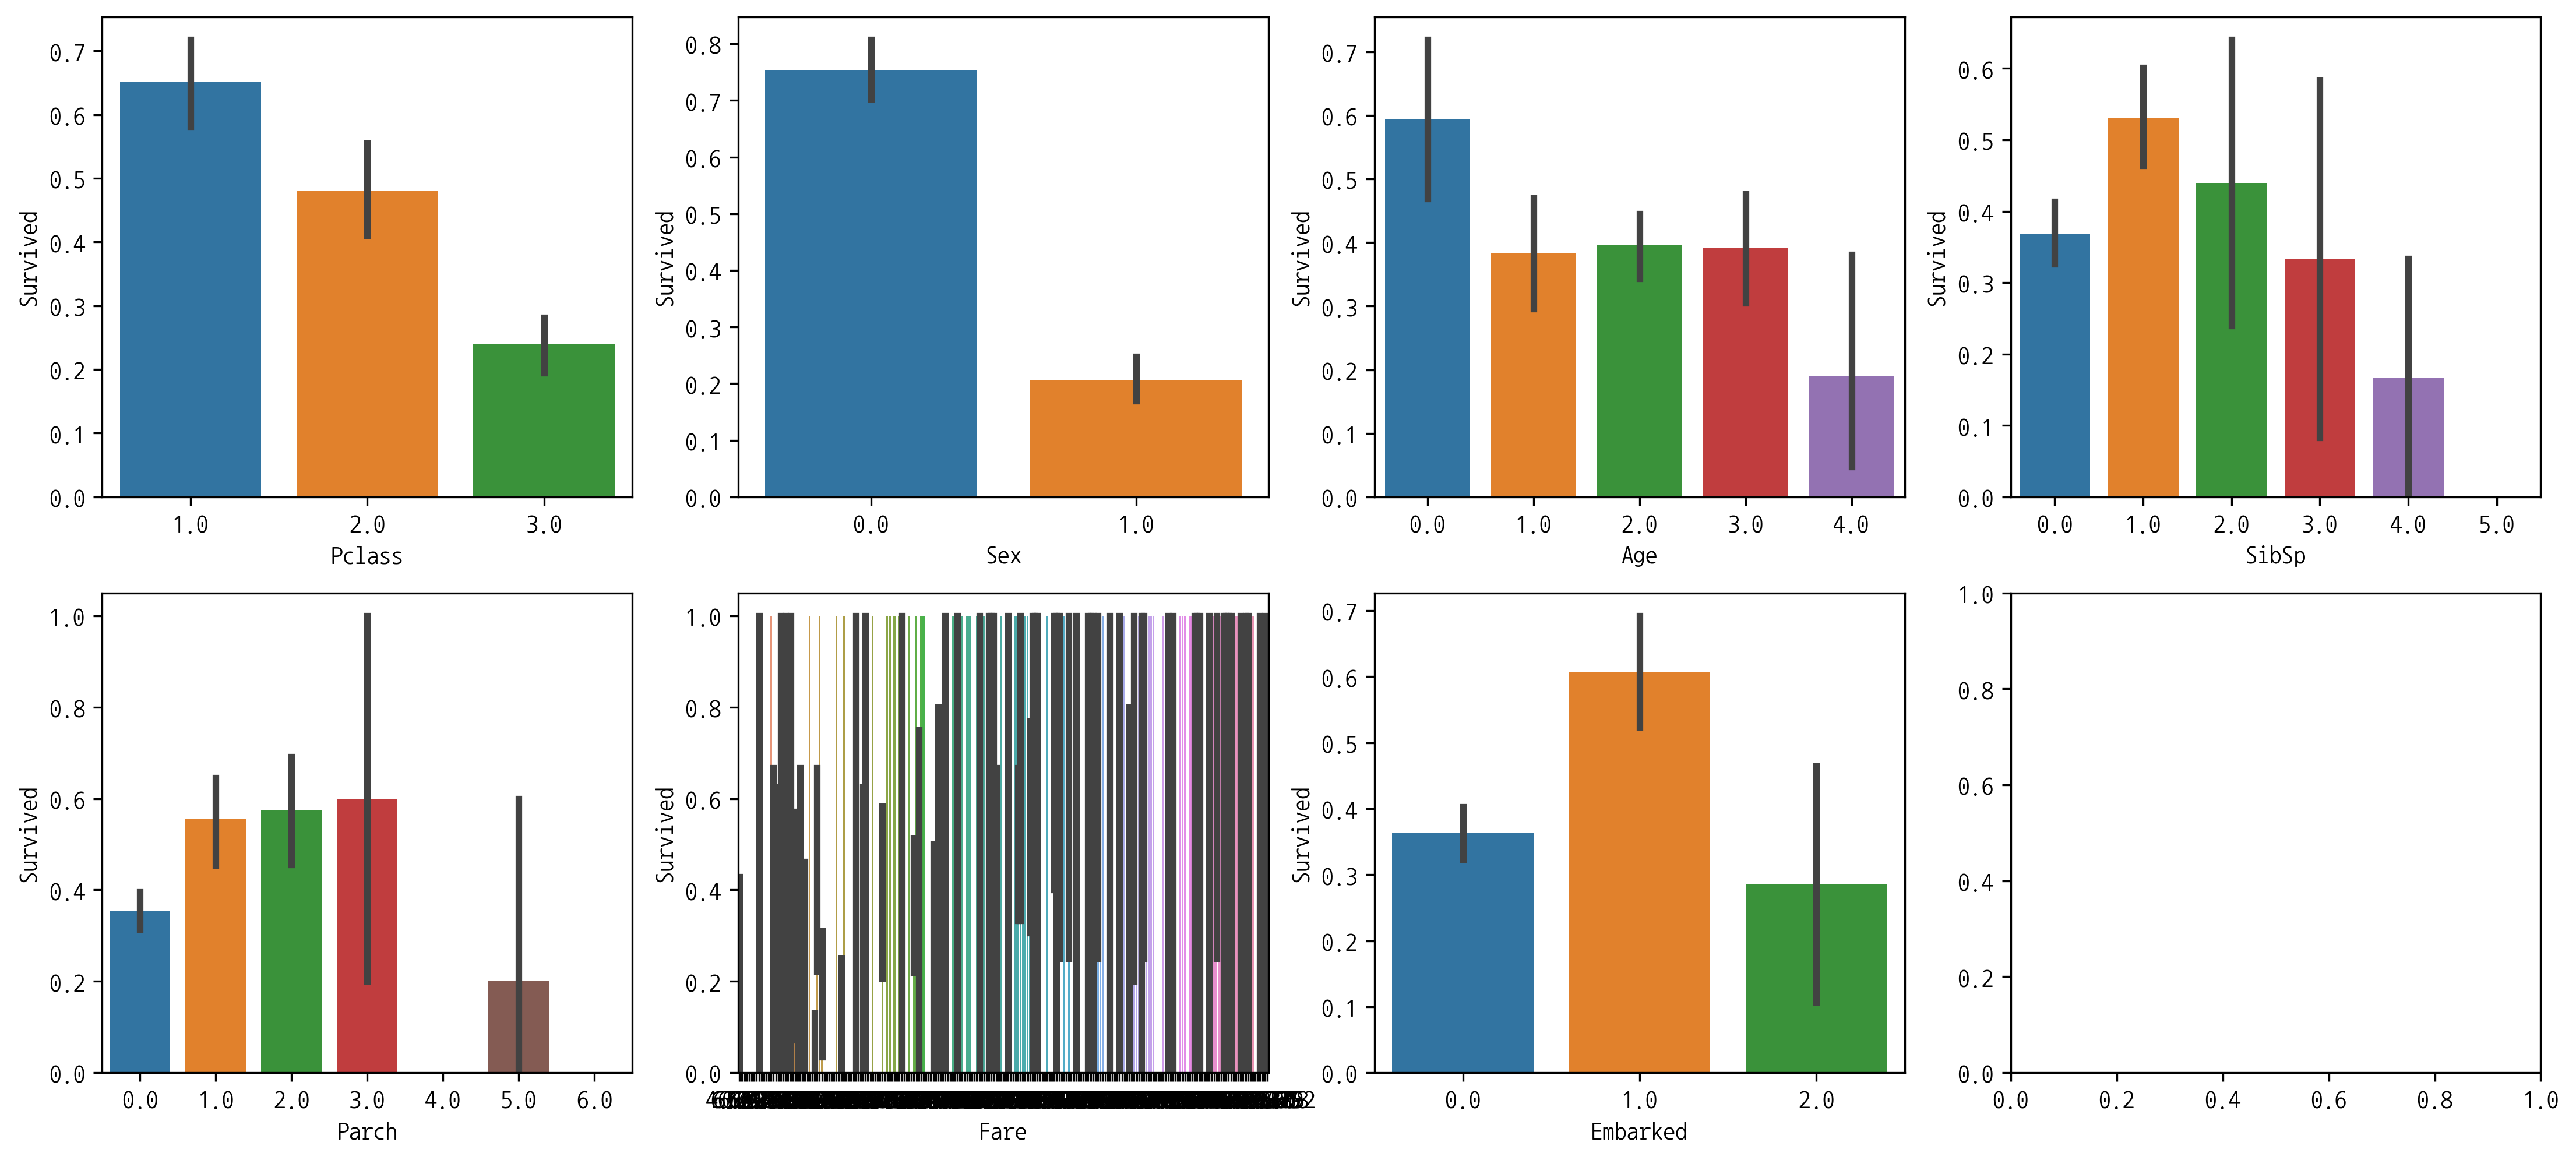

In [107]:
import seaborn as sns
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
colnames= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
i = 0
for row in range(2):
    for col in range(4):
        try:
#             temp = train.groupby(['Survived',colnames[i]]).count()
            sns.barplot(data=train, x= colnames[i], y= "Survived",ax=ax[row, col])
            i += 1
        except:
            continue
plt.show()

In [185]:
x_train= train[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train = train.iloc[:,0]
x_test =test[['Pclass','Sex','Age','SibSp','Parch','Fare']]
x_train.shape, y_train.shape,x_test.shape

((712, 6), (712,), (331, 6))

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(x_train)
test_features = scaler.transform(x_test)

log_reg = LogisticRegression(C=100.0)
logreg =log_reg.fit(train_features,y_train)
print('훈련세트점수: {:.2f}'.format(logreg.score(train_features, y_train)))

# y_pred = log_reg.predict(x_test)
# print(y_pred)
# print(list(y_test))

# print('정확도 :', metrics.accuracy_score(y_test, y_pred))

훈련세트점수: 0.80


In [196]:
logreg.predict(train_features)

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [188]:
import statsmodels.api as sm
# 첫 번째 필드(Survived)는 종속변수 즉, 생존여부컬럼이기 때문에 제외
# 즉, 생존여부는 종속변수이고 그외 컬럼은 독립변수
# 생존여부를 제거해줌
xx = x_train.columns[:]
xx

# # 로지스틱 회귀분석 모델을 생성
# # sm.Logit(종속변수, 독립변수) 종속과 독립을 파라미터로 받고 

logit = sm.Logit(train['Survived'],x_train[xx])
# # 모델에 데이터를 입력하여 기계학습을 실행
result = logit.fit()
result.summary2() # 분석결과

Optimization terminated successfully.
         Current function value: 0.509514
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.245     
Dependent Variable: Survived         AIC:              737.5473  
Date:               2020-08-27 12:26 BIC:              764.9558  
No. Observations:   712              Log-Likelihood:   -362.77   
Df Model:           5                LL-Null:          -480.45   
Df Residuals:       706              LLR p-value:      7.6020e-49
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    0.1033     0.0767     1.3472   0.1779   -0.0470    0.2536
Sex      -2.1296     0.1955   -10.8953   0.0000   -2.5127   -1.7465
Age       0.0032     0.0057     0.5577   0.5770   -0.0079    0.0143
SibSp    -0.2276     0.1167    -1.9499   0.0512   -0.4564    0.0012
Parch    -0.1066     0.1160    -0.9190   0.3581   -0.3338    0.1207
Fare      0.0195     0.0034     5.7470   0.0000    0.0128    0.0261
=================================================================

"""

In [ ]:
model = Sequential()
model.add(Dense(255, input_shape=(7,),activation='relu')) # relu는 0아니면 무한대이다.
model.add(Dense(1, activation='sigmoid')) # 0 아니면 1일 때는 sigmoid 사용
# relu를 주면 안됨 결과 값은 1 or 0 이기 때문
# 2진이면 binary_cross ...
model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])
model.summary()

In [160]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [161]:
train = pd.read_csv("2019-1st-ml-month-with-kakr/train.csv")
test = pd.read_csv("2019-1st-ml-month-with-kakr/test.csv")

In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
# 처리하기 복잡한 Column은 제거
del train['Ticket']; del test['Ticket']
del train['Cabin']; del test['Cabin']
del train['Name']; del test['Name']

In [165]:
test.insert(loc=1, column='Survived', value=0)

In [167]:
total = pd.concat([train, test], axis=0)

In [170]:
sex = pd.get_dummies(total['Sex'])
embarked = pd.get_dummies(total['Embarked'])

In [172]:
del total['Sex']
del total['Embarked']

In [173]:
total = pd.concat([total, sex, embarked], axis=1)
total['Family'] = total['Parch'] + total['SibSp']

In [175]:
train = total[0:len(train)]
test = total[len(train):]

In [176]:
target = 'Survived'
IDcol = 'PassengerId'

In [190]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
   
    # get new n_estimator
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(alg)
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Survived'], eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Training Accuracy : %.4g" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions))

In [191]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    seed=2019
)
modelfit(xgb1, train, predictors)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, nthread=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, seed=2019, subsample=0.8, tree_method=None,
              validate_parameters=None, verbosity=None)

Model Report
Training Accuracy : 0.8581


In [197]:
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=5, 
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=-1, 
                                                  scale_pos_weight=1, seed=2019),
param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    6.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.8s finished


({'mean_fit_time': array([0.2272131 , 0.22441282, 0.22781305, 0.34861994, 0.31301804,
         0.28401618, 0.37962165, 0.32421861, 0.29481678]),
  'std_fit_time': array([0.00318771, 0.00407941, 0.01146177, 0.01233931, 0.00887741,
         0.00782352, 0.00813936, 0.00699752, 0.01202397]),
  'mean_score_time': array([0.00640039, 0.00580034, 0.00520029, 0.00840049, 0.0070003 ,
         0.00600038, 0.00860057, 0.00780039, 0.00640035]),
  'std_score_time': array([1.01995443e-03, 1.16623670e-03, 3.99994889e-04, 8.00108929e-04,
         1.16800773e-07, 1.16800773e-07, 4.89959812e-04, 1.46981444e-03,
         4.89881921e-04]),
  'param_max_depth': masked_array(data=[3, 3, 3, 6, 6, 6, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, 

In [198]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test2, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

[12:36:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




({'mean_fit_time': array([0.23201332, 0.23321338, 0.23701353, 0.23501353, 0.22441292]),
  'std_fit_time': array([0.00985955, 0.00830464, 0.01029628, 0.00766865, 0.00224507]),
  'mean_score_time': array([0.00520034, 0.00540032, 0.00540037, 0.00480027, 0.00480022]),
  'std_score_time': array([0.00039997, 0.00080006, 0.00048992, 0.00040004, 0.00040002]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.81818182, 0.8041958 , 0.8041958 , 0.8041958 , 0.81818182]),
  'split1_test_score': array([0.83216783, 0.83216783, 0.83216783, 0.83216783, 0.83216783]),
  'split2_test_score': array([0.84507042, 0.83802817, 0.85211268, 0.84507042, 0.85211268]),
  'split3_test_score': array([0.82394366, 0.82394366, 0.83098592, 0.83098592, 0.83802817]),

In [200]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test3, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s


[12:36:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.9s finished


({'mean_fit_time': array([0.22621298, 0.2240128 , 0.22061262, 0.21241212, 0.23021317,
         0.21941271, 0.21441231, 0.21141205, 0.25241446, 0.26241493,
         0.24881434, 0.24481406, 0.25601449, 0.24881425, 0.24701419,
         0.23461342]),
  'std_fit_time': array([0.01160056, 0.00931717, 0.01032731, 0.00403   , 0.01390635,
         0.00508359, 0.00749966, 0.00392963, 0.01009208, 0.02150104,
         0.01652244, 0.02619612, 0.00209774, 0.00652428, 0.00994028,
         0.00488277]),
  'mean_score_time': array([0.00500026, 0.0056004 , 0.00600038, 0.00580044, 0.00480032,
         0.00500026, 0.00520024, 0.00660038, 0.00500016, 0.00500031,
         0.00540018, 0.0056004 , 0.00520039, 0.00560017, 0.00500026,
         0.00500035]),
  'std_score_time': array([1.90734863e-07, 4.89842988e-04, 1.54929652e-03, 1.60017015e-03,
         7.48391947e-04, 1.16800773e-07, 4.00137912e-04, 3.20017338e-03,
         6.32485089e-04, 9.53674316e-08, 4.89979242e-04, 8.00049321e-04,
         4.00066433e-